In [165]:
import xarray as xr

In [199]:
grid = xr.open_dataset('../../data/rcp85_land-cpm_uk_2.2km_grid.nc')
x = grid['projection_x_coordinate'][:].values
y = grid['projection_y_coordinate'][:].values

In [201]:
#import numpy as np
y = np.sort(y)
x = np.sort(x)

In [202]:
data = xr.open_dataset('../../data/tasmax_hadukgrid_uk_1km_day_20000101-20000131.nc', decode_coords="all")

In [223]:
def resampling(data,method1,method2):
    resampled_linear = data[['tasmax']].interp(projection_x_coordinate=x, projection_y_coordinate=y, method=method1, method_non_numeric=method2)
    resampled_slice =resampled_linear.sel(projection_x_coordinate=slice(200000, 210000),projection_y_coordinate=slice(700000, 710000))
    resampled_slice.isel(time=0)['tasmax'].plot()

# Replacing the interpolation method 

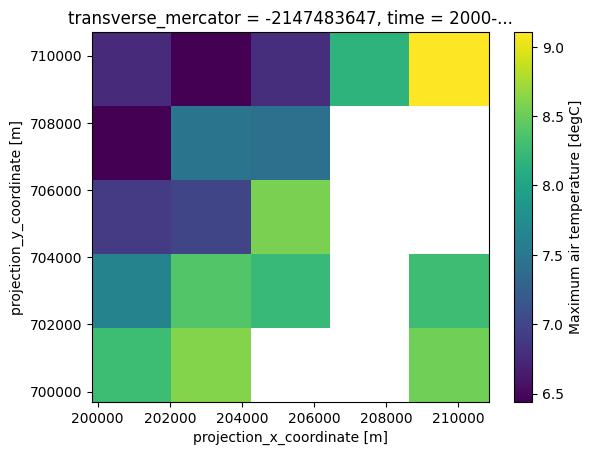

In [224]:
resampling(data,'linear','nearest')

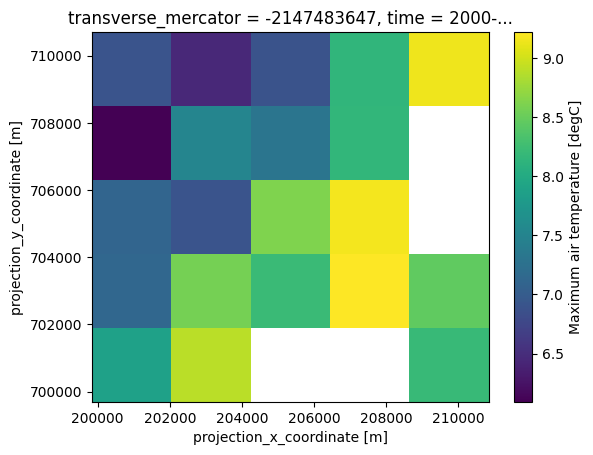

In [225]:
resampling(data,'nearest','nearest')

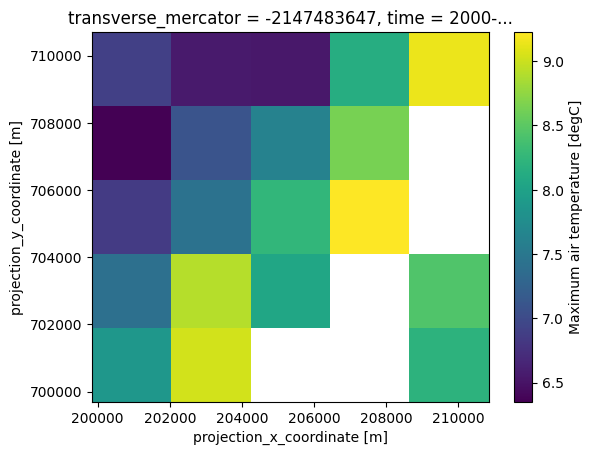

In [229]:
resampling(data,'zero','nearest')

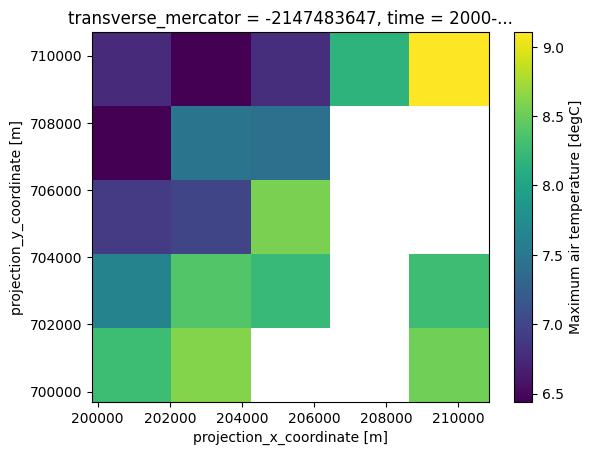

In [227]:
resampling(data,'slinear','nearest')

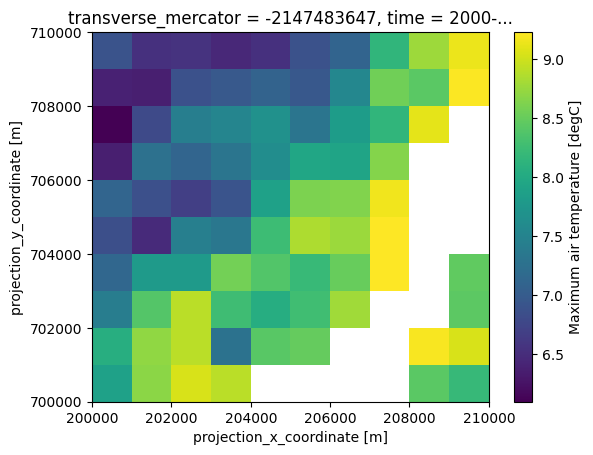

In [230]:
og =data.sel(projection_x_coordinate=slice(200000, 210000),projection_y_coordinate=slice(700000, 710000))
og.isel(time=0)['tasmax'].plot()